# Multi variable regression

Input space : two variables x1 and x2

visualization : 3d 

we try to fit a plane instead of line to minimize the error

equation of plane : y = w1 x1 + w2 x2 + b

Adding more dimensions (hyperplane)

y = w1 x1 + w2 x2 + w3 x3 +  ...    +b

To make it more uniform, rewriting it to 

y = w0 x0 + w1 x1 + w2 x2 + w3 x3 +  ...    where x0 = 1

In [1]:
import numpy as np

# Load the four columns from the file into four arrays. The first
# three contain the values of the three input variables, and the
# fourth contains the labels:
x1, x2, x3, y = np.loadtxt("pizza_multiple.txt", skiprows=1, unpack=True)

# Build a matrix with a column of 1s for the bias, and one column
# for each input variable:
X = np.column_stack((np.ones(x1.size), x1, x2, x3))

# Reshape the labels to be a matrix with one column, and as many
# rows as necessary:
Y = y.reshape(-1, 1)

In [ ]:
X

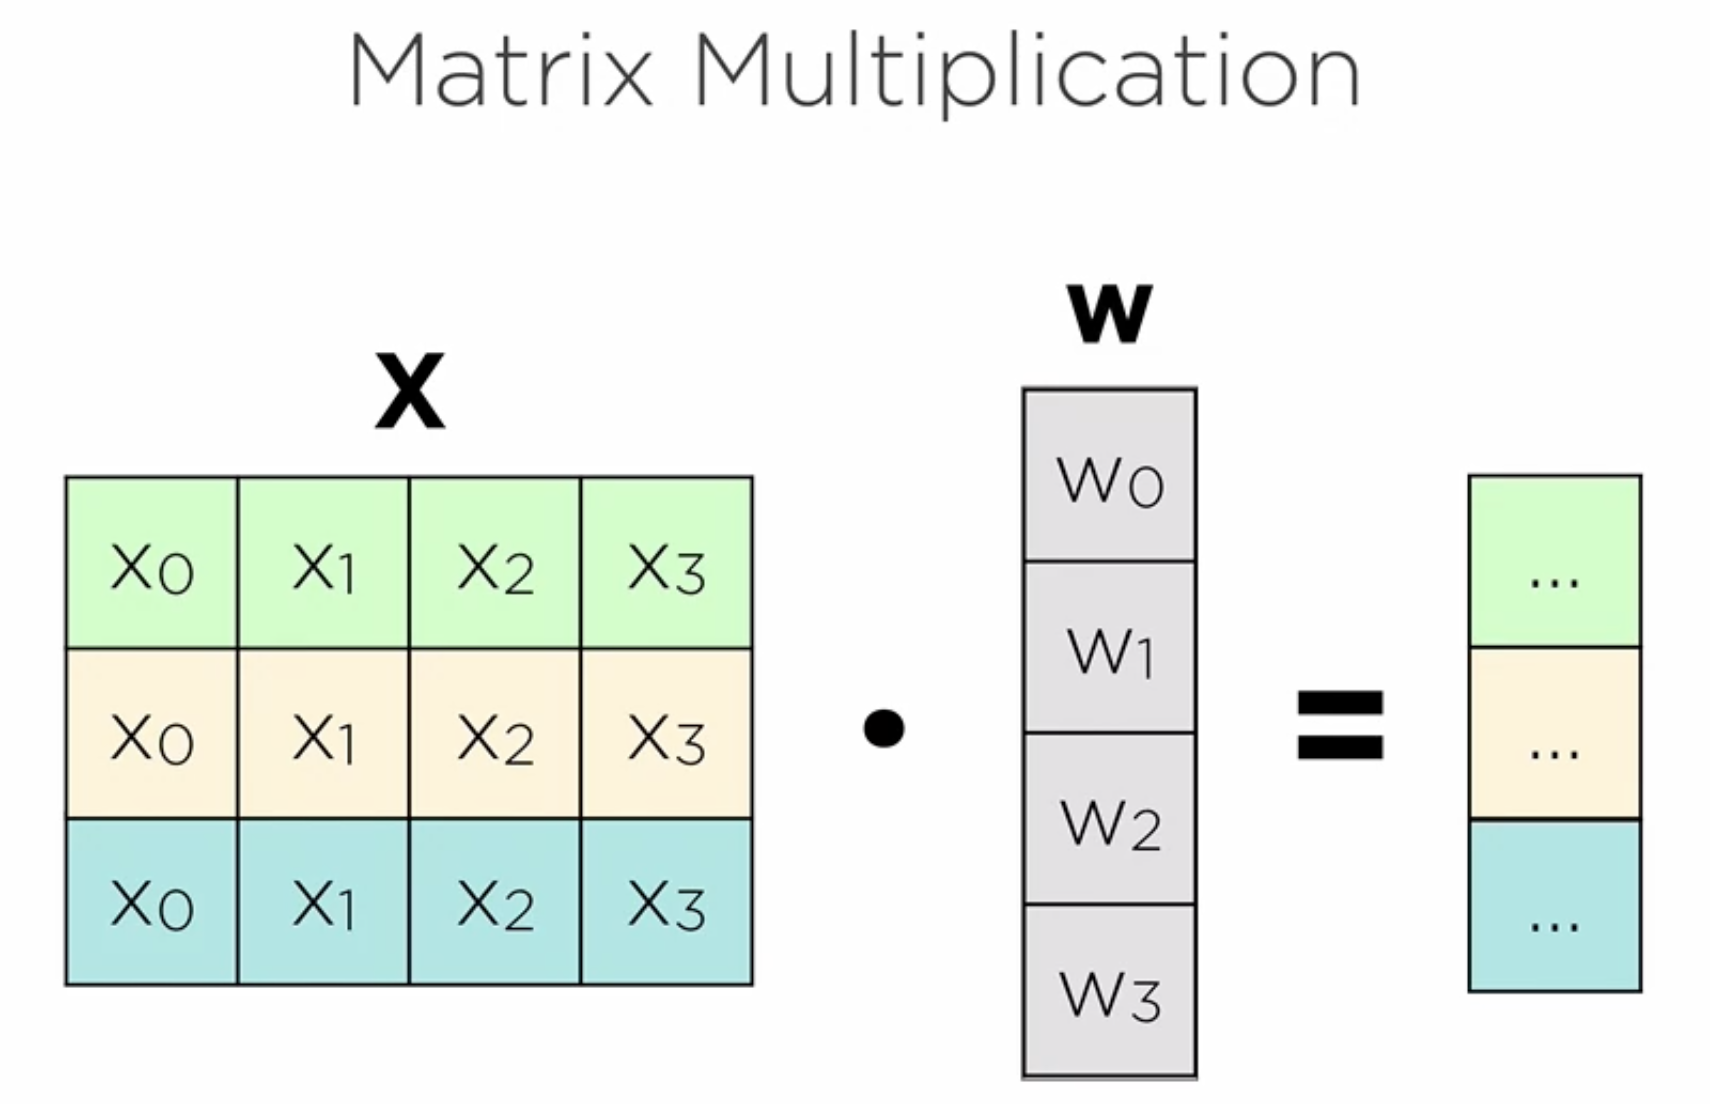

In [3]:
def predict(X,w):
    return np.matmul(X,w)

In [4]:
def loss(X, Y, w):
    predictions = predict(X, w)
    return np.average((predictions - Y) ** 2)

In [6]:
def gradient(X,Y,w):
    #return np.average(2 * X * (predict(X,w) - Y))
    return 2 * np.matmul(X.T, (predict(X, w) - Y)) / X.shape[0]


In [ ]:
def train(X, Y, iterations, lr):
    # The weights should have one column, and as many rows
    # as there are input variables–that is, as many rows as
    # The columns in X:
    # X.shape returns rows,column
    w = np.zeros((X.shape[1], 1))

    for i in range(iterations):
        print("Iteration %4d => Loss: %.20f" % (i, loss(X, Y, w)))
        w -= gradient(X, Y, w) * lr
    return w